In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/5Mall_Customers.csv')

In [6]:
data.describe()
data.columns
data.head(5)
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


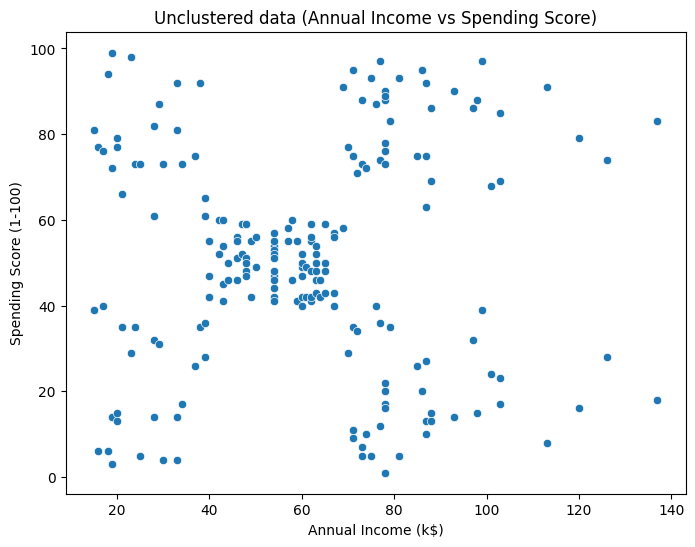

In [7]:
plt.figure(figsize=(8, 6))
plt.title('Unclustered data (Annual Income vs Spending Score)')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.show()


In [8]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
from sklearn.cluster import KMeans

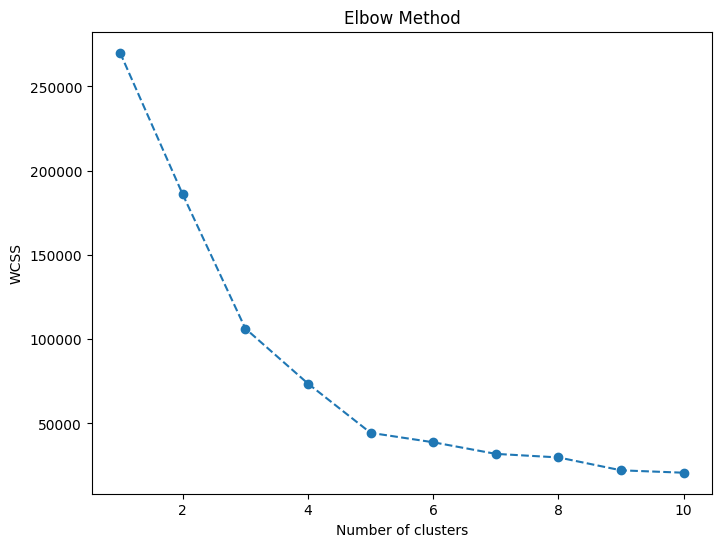

In [10]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Ploting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

data['Cluster'] = kmeans.labels_

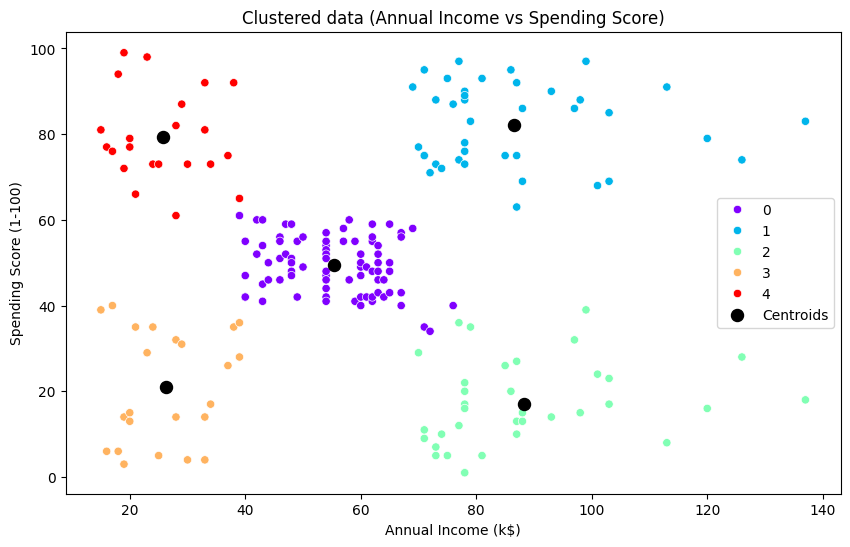

In [12]:
plt.figure(figsize=(10, 6))
plt.title('Clustered data (Annual Income vs Spending Score)')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='rainbow', data=data)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='.', label='Centroids')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
silhouette= silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.553931997444648


In [17]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

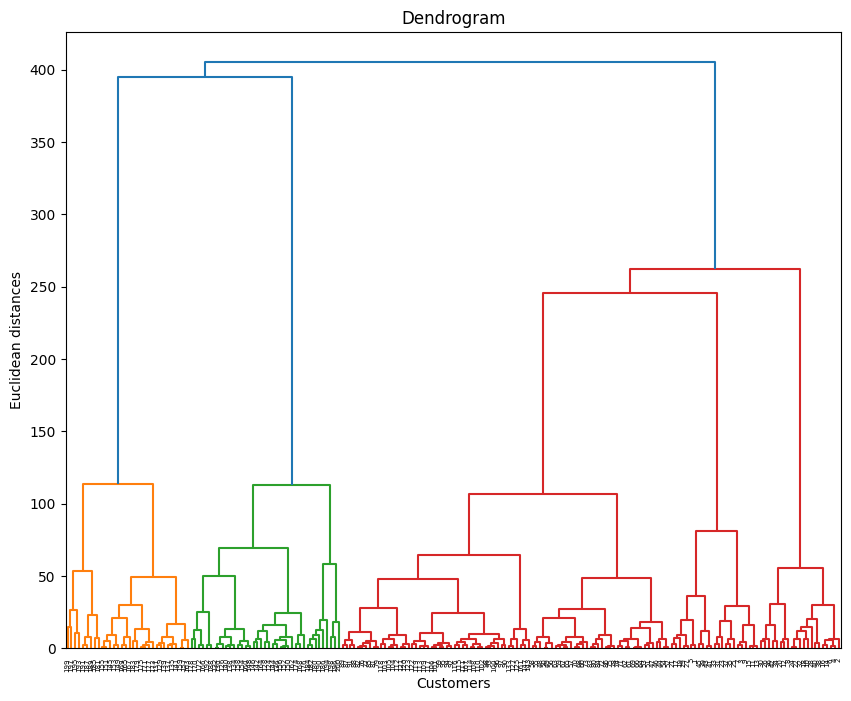

In [22]:
plt.figure(figsize=(10, 8))
linked = linkage(X, method='ward')

dendrogram(linked,
          orientation='top',
           labels=data['CustomerID'].astype(str).values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [15]:
#...............................................................................................

Number of clusters: 2, Silhouette Score: 0.3774913479961559
Number of clusters: 3, Silhouette Score: 0.46761358158775435
Number of clusters: 4, Silhouette Score: 0.41508307009338524
Number of clusters: 5, Silhouette Score: 0.553931997444648
Number of clusters: 6, Silhouette Score: 0.5375812731362782
Number of clusters: 7, Silhouette Score: 0.45611379440879946
Number of clusters: 8, Silhouette Score: 0.42171151217040276
Number of clusters: 9, Silhouette Score: 0.4242794142604815


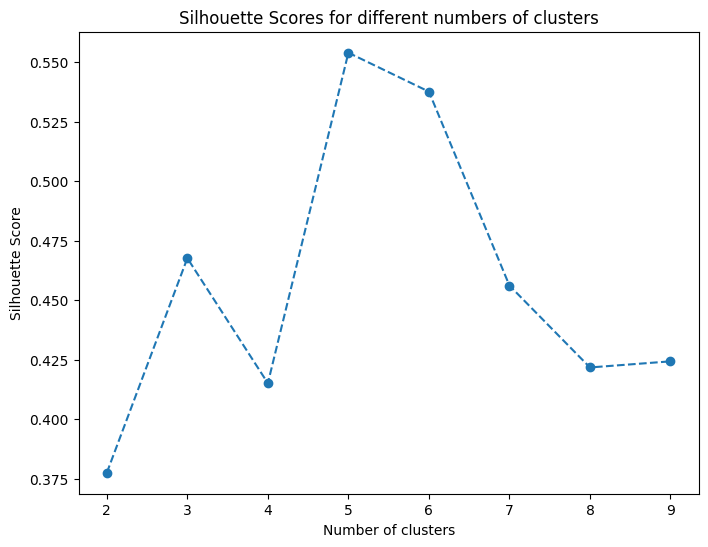

In [16]:
cluster_range = range(2, 10)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=30)
    kmeans.fit(X)


    labels = kmeans.labels_


    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")


plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()